![example](images/director_shot.jpeg)

#  Reel Profits: Analyzing Movie Genres and Their Financial Success


**Author:** Matilda Odalo
***

## Overview


The Microsoft project aims to evaluate the practicability of establishing a movie studio by analyzing data on movie ratings, movie titles, budgets, genres, gross revenues and various movie studios. This analysis allows for a deeper understanding of the types of movies that have the highest potential for generating substantial gross revenues and a high return on investment(ROI).

In this document, we will identify the significant opportunities that lie ahead the film market. By examining the trends, patterns, and success factors within the industry, we will provide actionable recommendations on how Microsoft can effectively penetrate the film market and position itself for success. The insights and strategic guidance will enable Microsoft to make informed decisions regarding movie production, resource allocation, and potential partnerships, ensuring a strong foothold in the dynamic and rewarding film industry.


## Business Problem

The problem at hand is to determine the viability of Microsoft establishing a movie studio. The objective is to analyze various data points such as movie ratings, budgets, genres, and gross revenues to gain insights into the factors that contribute to the success and profitability of movies and movie studios. By understanding the types of movies that have the potential to generate substantial gross revenues and a high return on investment (ROI), Microsoft can make informed decisions about entering the competitive film market. The goal is to provide actionable recommendations on how Microsoft can effectively penetrate the film market, allocate resources wisely, and potentially form strategic partnerships. Ultimately, the aim is to position Microsoft for success in the dynamic and rewarding film industry.

The questions to be answered by this analysis include:

- What are the most prevalent movie genres?
-  What are the top 5 highest rated movie genres?
- Which genres tend to have the highest Return on Investment (ROI), and which genres tend to have the lowest Return on Investment (ROI)?
- What is the distribution of net profit across different movie genres, and are there any genres that consistently tend to generate higher net profits than others?
-  Is there a correlation between the production budget and the net profit?
- Which movie studios have generated the highest net profit?
- Which genres are most frequently produced by the top 4 movie studios with the highest net profit?

# Data Understanding

The data used for this project was sourced from various datasets including IMDb(Internet Movie Database). The datasets contain information about movies including their titles, release dates, production budgets, domestic and worldwide grosses, genres, runtimes, average ratings and studios responsible for production. The sample contains wide variety of movies ranging from small independent films to big-budget Hollywood blockbusters.

Moreover, the data represents a collection of movies from different genres produced and released over a range of years. 

The properties of the variables used in the analysis are as follows:
- Categorical variables: genres, studios
- Numerical variables: production budgets, domestic and worldwide grosses, gross profits, average ratings, number of votes, runtimes, and ROI.
The data will be used to explore relationships between different variables, identify trends, and make recommendations to Microsoft on their movie studio venture.

## Loading and Exploring the data

In [1]:
#Import standard packages
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Assigning the needed files for analysis to their respective variables while exploring the needed data sets as well as cleaning them.

### Ratings cleaning

In [2]:
#importing title.ratings.csv
ratings =pd.read_csv('zippedData/title.ratings.csv')
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [3]:
#Cleaning the column
ratings.columns =  [col.strip() for col in ratings.columns]
ratings.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [4]:
#getting a concise summary of the DataFrame's structure and content,
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The title.ratings.csv file does not have duplicates nor missing values.

### Movie budget cleaning

In [5]:
#importing tn.movie_budgets.csv. index_col=0 to use the first column of the dataset as the index for the DataFrame.
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv', index_col = 0)
movies_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
#getting a concise summary of the DataFrame's structure and content
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


As seen above, the values in the column release_date, production_budget, domestic and worldwide_gross are the wrong data types. Below the appropriate codes will be used to convert them into the correct data type.

In [7]:
#changing the columns with gross and budget to float data type
movies_budget['production_budget'] = movies_budget['production_budget'].str.replace(',', '')
movies_budget['production_budget'] = movies_budget['production_budget'].str.replace('$', '')
movies_budget['production_budget'] = movies_budget['production_budget'].astype(float)

movies_budget['domestic_gross'] = movies_budget['domestic_gross'].str.replace(',', '')
movies_budget['domestic_gross'] = movies_budget['domestic_gross'].str.replace('$', '')
movies_budget['domestic_gross'] = movies_budget['domestic_gross'].astype(float)

movies_budget['worldwide_gross'] = movies_budget['worldwide_gross'].str.replace(',', '')
movies_budget['worldwide_gross'] = movies_budget['worldwide_gross'].str.replace('$', '')
movies_budget['worldwide_gross'] = movies_budget['worldwide_gross'].astype(float)

In [8]:
#changing release_date column data type to datetime
movies_budget['release_date'] = pd.to_datetime(movies_budget['release_date'])

In [9]:
#summary statistics for the DataFrame 
movies_budget.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


In [10]:
#renaming the title column to movie_title
movies_budget = movies_budget.rename(columns={'movie' : 'movie_title'})

In [11]:
#checking whether the code worked
movies_budget.sort_values(by='movie_title').head()

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
id,,,,,
16,2015-11-20,#Horror,1500000.0,0.0,0.0
55,2009-07-17,(500) Days of Summer,7500000.0,32425665.0,34439060.0
54,2016-03-11,10 Cloverfield Lane,5000000.0,72082999.0,108286422.0
48,2015-11-11,10 Days in a Madhouse,12000000.0,14616.0,14616.0
63,1999-03-31,10 Things I Hate About You,13000000.0,38177966.0,60413950.0


In [12]:
#created a column with the net profit and another for the RIO in decimal form not forgeting a foreign gross columns
movies_budget['net_profit'] = movies_budget['worldwide_gross'] - movies_budget['production_budget']
movies_budget['return_on_investment'] = (movies_budget['net_profit'] / movies_budget['production_budget']) - 1
movies_budget['foreign_gross'] = movies_budget['worldwide_gross'] - movies_budget['domestic_gross']

In [13]:
#checking for duplicate values and sorting by movie_title
movies_budget_duplicates = movies_budget[movies_budget.duplicated(subset=['movie_title'],keep=False)].sort_values(['movie_title'])
#dropping the duplicate values
movies_budget= movies_budget.drop_duplicates(subset='movie_title')
#recheking for duplicates
movies_budget[movies_budget.duplicated(subset=['movie_title'])].sort_values(['movie_title'])

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,net_profit,return_on_investment,foreign_gross
id,,,,,,,,


In [14]:
#sorting the dataframe by release date
movies_budget.sort_values(['release_date'])

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,net_profit,return_on_investment,foreign_gross
id,,,,,,,,
24,1916-09-05,Intolerance,385907.0,0.0,0.0,-385907.0,-2.000000,0.0
84,1920-09-17,Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0,2900000.0,28.000000,0.0
7,1925-11-19,The Big Parade,245000.0,11000000.0,22000000.0,21755000.0,87.795918,11000000.0
70,1925-12-30,Ben-Hur: A Tale of the Christ,3900000.0,9000000.0,9000000.0,5100000.0,0.307692,0.0
85,1927-08-12,Wings,2000000.0,0.0,0.0,-2000000.0,-2.000000,0.0
...,...,...,...,...,...,...,...,...
16,2019-12-31,Eli,11000000.0,0.0,0.0,-11000000.0,-2.000000,0.0
30,2019-12-31,Reagan,25000000.0,0.0,0.0,-25000000.0,-2.000000,0.0
36,2020-02-21,Call of the Wild,82000000.0,0.0,0.0,-82000000.0,-2.000000,0.0


In [15]:
#I decided to use data from 2010 in my analysis
movies_budget = movies_budget[movies_budget['release_date'].dt.year >= 2010].sort_values(by='release_date')
movies_budget.head()

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,net_profit,return_on_investment,foreign_gross
id,,,,,,,,
67,2010-01-08,Daybreakers,20000000.0,30101577.0,51445503.0,31445503.0,0.572275,21343926.0
13,2010-01-08,Youth in Revolt,18000000.0,15285588.0,19685588.0,1685588.0,-0.906356,4400000.0
40,2010-01-08,Leap Year,19000000.0,25918920.0,32618920.0,13618920.0,-0.283215,6700000.0
36,2010-01-15,Fish Tank,3000000.0,374675.0,5922292.0,2922292.0,-0.025903,5547617.0
68,2010-01-15,The Spy Next Door,28000000.0,24307106.0,46752858.0,18752858.0,-0.330255,22445752.0


In [16]:
#Cleaning the columns
movies_budget.columns =  [col.strip() for col in movies_budget.columns]
movies_budget.columns

Index(['release_date', 'movie_title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'net_profit', 'return_on_investment',
       'foreign_gross'],
      dtype='object')

In [17]:
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 67 to 6
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          2175 non-null   datetime64[ns]
 1   movie_title           2175 non-null   object        
 2   production_budget     2175 non-null   float64       
 3   domestic_gross        2175 non-null   float64       
 4   worldwide_gross       2175 non-null   float64       
 5   net_profit            2175 non-null   float64       
 6   return_on_investment  2175 non-null   float64       
 7   foreign_gross         2175 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 152.9+ KB


Movies_budget does not have missing values.

### Movie gross cleaning

In [18]:
#importing bom.movie_gross.csv
movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
movies_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [19]:
#renaming the year and title column
movies_gross =  movies_gross.rename(columns={'year' : 'release_year'})
movies_gross = movies_gross.rename(columns={'title' : 'movie_title'})

In [20]:
#summary statistics of movies_gross
movies_gross.describe() 

,domestic_gross,release_year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [21]:
##getting a concise summary of the DataFrame's structure and content
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   release_year    3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [22]:
#checking for duplicates in the movie_title column and sorting by movie
movies_gross[movies_gross.duplicated(subset='movie_title')].sort_values(by='movie_title')
#cheking why the 'Bluebeard' is taken as a duplicate
movies_gross[movies_gross['movie_title'] == 'Bluebeard'].sort_values(by='movie_title')

,movie_title,studio,domestic_gross,foreign_gross,release_year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


These are not duplicates but two movies made in different studios and released in different years therefore they will not be dropped

In [23]:
##checking how many null values in the studio column
movies_gross['studio'].isnull().sum()

5

In [24]:
#filling the null values with 'Unknown
movies_gross['studio'] = movies_gross['studio'].fillna('Unknown')

In [25]:
#checking how many null values in the domestic_gross column
movies_gross['domestic_gross'].isnull().sum()

28

In [26]:
#filling the null values with 0 by assuming that those studios made no domestic gross
movies_gross['domestic_gross'] = movies_gross['domestic_gross'].fillna(0)

In [27]:
#checking how many null values in the foreign_gross column
movies_gross['foreign_gross'].isnull().sum()

1350

In [28]:
#filling the null values with 0 by assuming that those studios made no foreign gross
movies_gross['foreign_gross'] = movies_gross['foreign_gross'].fillna(0)

In [29]:
movies_gross.sort_values(by='release_year')

,movie_title,studio,domestic_gross,foreign_gross,release_year
0,Toy Story 3,BV,415000000.0,652000000,2010
222,Flipped,WB,1800000.0,0,2010
221,Cairo Time,IFC,1600000.0,391000,2010
220,After.Life,Anch.,109000.0,1900000,2010
219,Golmaal 3,Eros,1100000.0,935000,2010
...,...,...,...,...,...
3177,Mary Queen of Scots,Focus,16500000.0,29900000,2018
3176,Tyler Perry's Acrimony,LGF,43500000.0,2900000,2018
3175,Uncle Drew,LG/S,42500000.0,4200000,2018
3182,Show Dogs,Global Road,17900000.0,21300000,2018


In [30]:
#cleaning the columns
movies_gross.columns = [col.strip() for col in movies_gross.columns]
movies_gross.columns

Index(['movie_title', 'studio', 'domestic_gross', 'foreign_gross',
       'release_year'],
      dtype='object')

In [31]:
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   release_year    3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Title basics cleaning

In [32]:
#importing title.basics.csv
title_basics = pd.read_csv('zippedData/title.basics.csv')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [33]:
#getting a concise summary of the DataFrame's structure and content
title_basics.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [34]:
#renaming start_year column to release_year
title_basics = title_basics.rename(columns={'start_year' : 'release_year'})
title_basics = title_basics.rename(columns={'primary_title':'movie_title'})
#Dropping the original _title column because the common titles are in the primary title and also renaming primary_title to movie_title
title_basics = title_basics.drop(columns='original_title')

In [35]:
#cehcking for null values in the data frame
title_basics_null = title_basics.isnull().sort_values(by= 'release_year', ascending=False)
title_basics_null.sum()

tconst                 0
movie_title            0
release_year           0
runtime_minutes    31739
genres              5408
dtype: int64

In [36]:
#filling the null values in runtime_minutes column with the median of the column because runtime of movies cannot be zero and changing the data type to int
title_basics['runtime_minutes'] = title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].median())
title_basics['runtime_minutes'] = title_basics['runtime_minutes'].astype(int)


In [37]:
#checking for duplicates
title_basics_dups =  title_basics[title_basics.duplicated(subset=['movie_title', 'release_year', 'genres'])].sort_values(by='movie_title')
title_basics_dups[49:100] #displaying between the 50th and 100th rows

,tconst,movie_title,release_year,runtime_minutes,genres
87180,tt5065212,Car Lot,2015,86,NaN
94229,tt5492502,Cargo,2017,91,Drama
25606,tt2023420,Carte Blanche,2011,91,Documentary
66770,tt3803974,Changes,2014,87,Drama
82099,tt4717682,Charlie,2016,87,Crime
2835,tt10294034,Cinema of Sleep,2020,87,Thriller
44161,tt2626798,Circles,2013,87,Drama
140296,tt9093364,Clown vs. Vampires,2019,87,Horror
85392,tt4942482,Cobb Field,2015,65,NaN
54329,tt3196158,Collapse,2013,97,Drama


In [38]:
#checking which rows have the most missing rows and dropping the duplicates but keeping the ones with less to no mission values
title_basics_dups_df = title_basics.copy()
title_basics_dups_df = title_basics_dups_df.assign(missing=title_basics_dups_df.isnull().sum(axis=1)).sort_values(by=['movie_title', 'missing'], ascending=True)
title_basics_dups_df[title_basics_dups_df.duplicated(keep=False, subset=['movie_title','release_year'])][50:70]

,tconst,movie_title,release_year,runtime_minutes,genres,missing
123409,tt7487314,A Dark Place,2018,120,Drama,0
71246,tt4073868,A Decent Man,2015,94,"Comedy,Crime,Drama",0
71555,tt4084060,A Decent Man,2015,111,Drama,0
59261,tt3447830,A Esperança é a Última que Morre,2015,90,Comedy,0
110170,tt6448540,A Esperança é a Última que Morre,2015,87,NaN,1
72487,tt4137808,A Family Affair,2015,82,"Biography,Documentary,Family",0
80949,tt4653186,A Family Affair,2015,110,Documentary,0
22525,tt1926213,A Fine Line,2011,65,Crime,0
28706,tt2108458,A Fine Line,2011,50,"Action,Adventure,Documentary",0
100008,tt5843376,A Hungarian Symphony,2015,13,Documentary,0


In [39]:
#dropping duplicates and keeping the first occurence of each duplicate row
title_basics_dups_df = title_basics_dups_df.drop_duplicates(keep='first', subset=['movie_title','release_year']).drop(columns='missing')
title_basics_dups_df

,tconst,movie_title,release_year,runtime_minutes,genres
13871,tt1699720,!Women Art Revolution,2010,83,Documentary
37039,tt2346170,#1 Serial Killer,2013,87,Horror
52892,tt3120962,#5,2013,68,"Biography,Comedy,Fantasy"
131857,tt8219776,#5,2018,87,Documentary
77936,tt4470336,#50Fathers,2015,132,Comedy
...,...,...,...,...,...
61849,tt3566826,è solo questione di punti di vista,2012,103,"Action,Adventure,Comedy"
61401,tt3547074,è solo questione di tempo,2013,72,Comedy
139058,tt8976950,élèctions piege à cons,2014,87,Comedy
102502,tt5997078,împetu,2017,87,Documentary


In [40]:
#rechecking for the duplicates
title_basics_dups_df[title_basics_dups_df.duplicated(keep=False, subset=['movie_title','release_year'])].sort_values(by=['movie_title','release_year'])

,tconst,movie_title,release_year,runtime_minutes,genres


In [41]:
#reassigning it title_basics
title_basics = title_basics_dups_df.copy()
title_basics.head()

,tconst,movie_title,release_year,runtime_minutes,genres
13871,tt1699720,!Women Art Revolution,2010,83,Documentary
37039,tt2346170,#1 Serial Killer,2013,87,Horror
52892,tt3120962,#5,2013,68,"Biography,Comedy,Fantasy"
131857,tt8219776,#5,2018,87,Documentary
77936,tt4470336,#50Fathers,2015,132,Comedy


In [42]:
#cleaning up the columns
title_basics.columns = [col.strip() for col in title_basics.columns]
title_basics.columns

Index(['tconst', 'movie_title', 'release_year', 'runtime_minutes', 'genres'], dtype='object')

In [43]:
#Making sure we are working with data that is not extraneous
title_basics[title_basics['release_year'] > 2023]

,tconst,movie_title,release_year,runtime_minutes,genres
89506,tt5174640,100 Years,2115,87,Drama
52213,tt3095356,Avatar 4,2025,87,"Action,Adventure,Fantasy"
96592,tt5637536,Avatar 5,2027,87,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,2024,87,"Adventure,Family,Fantasy"
2949,tt10300398,Untitled Star Wars Film,2026,87,Fantasy
2948,tt10300396,Untitled Star Wars Film,2024,87,NaN


In [44]:
#filtering the data so that only data from the year 2023 and earlier is used in the analysis
title_basics = title_basics[title_basics['release_year'] <= 2023].sort_values(by='release_year')
title_basics.tail(2)

,tconst,movie_title,release_year,runtime_minutes,genres
111226,tt6495056,Untitled Illumination Entertainment Project,2023,87,NaN
2906,tt10298848,Untitled Disney Live-Action Project,2023,87,NaN


In [45]:
#dropping null values in the genres column
title_basics = title_basics.dropna(subset=['genres'])

In [46]:
title_basics.duplicated(subset=['movie_title', 'release_year']).value_counts()

False    138921
dtype: int64

In [47]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138921 entries, 13871 to 16337
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   tconst           138921 non-null  object
 1   movie_title      138921 non-null  object
 2   release_year     138921 non-null  int64 
 3   runtime_minutes  138921 non-null  int32 
 4   genres           138921 non-null  object
dtypes: int32(1), int64(1), object(3)
memory usage: 5.8+ MB


## Merging dataframes to fit the analysis

The ratings dataset will be merged with the title_basics dataset. An inner join was done on the tconst column to only keep values common between the two darasets.

In [48]:
ratings_genre_merged = pd.merge(title_basics, ratings, on='tconst', how='inner').sort_values(by='release_year')
ratings_genre_merged.head(2)

,tconst,movie_title,release_year,runtime_minutes,genres,averagerating,numvotes
0,tt1699720,!Women Art Revolution,2010,83,Documentary,6.9,196
4439,tt1569498,Schastlivyy konets,2010,97,Comedy,3.2,192


In [49]:
ratings_genre_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72300 entries, 0 to 72299
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           72300 non-null  object 
 1   movie_title      72300 non-null  object 
 2   release_year     72300 non-null  int64  
 3   runtime_minutes  72300 non-null  int32  
 4   genres           72300 non-null  object 
 5   averagerating    72300 non-null  float64
 6   numvotes         72300 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 4.1+ MB


In [50]:
#checking for duplicates
ratings_genre_merged.duplicated(subset=['movie_title', 'tconst']).value_counts()

False    72300
dtype: int64

Merging the ratings_genre_merged with the movies_gross dataframe. An inner join was done on the movie_title column to only keep values common between the two darasets.

In [51]:
movieswithoutbudget = pd.merge(ratings_genre_merged, movies_gross, on='movie_title', how='inner')
movieswithoutbudget.head(2)

,tconst,movie_title,release_year_x,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,release_year_y
0,tt0947810,Green Zone,2010,115,"Action,Drama,Thriller",6.8,122132,Uni.,35100000.0,59800000,2010
1,tt1234654,Greenberg,2010,107,"Comedy,Drama,Romance",6.1,33702,Focus,4200000.0,1900000,2010


In [52]:
#checking for duplicates in the tconst column
movieswithoutbudget.duplicated(subset='tconst').value_counts()

False    2946
True        2
dtype: int64

In [53]:
#removing the duplicates
movieswithoutbudget = movieswithoutbudget.drop_duplicates(subset='tconst')
movieswithoutbudget.duplicated(subset='tconst').value_counts()

False    2946
dtype: int64

In [54]:
#rechecking for duplicates
movieswithoutbudget[movieswithoutbudget.duplicated(subset=['movie_title', 'tconst'])].sort_values(by='movie_title')[51:100]

,tconst,movie_title,release_year_x,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,release_year_y


In [55]:
#dropping release_year_y, domestic_gross, foreign_gross and renaming release_year_x to release_year
movieswithoutbudget = movieswithoutbudget.drop(columns=['release_year_y', 'domestic_gross', 'foreign_gross'])
movieswithoutbudget = movieswithoutbudget.rename(columns={'release_year_x' : 'release_year'})
movieswithoutbudget.head()

,tconst,movie_title,release_year,runtime_minutes,genres,averagerating,numvotes,studio
0,tt0947810,Green Zone,2010,115,"Action,Drama,Thriller",6.8,122132,Uni.
1,tt1234654,Greenberg,2010,107,"Comedy,Drama,Romance",6.1,33702,Focus
2,tt1438298,Guzaarish,2010,126,Drama,7.5,15402,UTV
3,tt1668200,Sarah's Key,2010,111,"Drama,War",7.5,15067,Wein.
4,tt1664892,"Happy, Happy",2010,85,"Comedy,Drama",6.5,2832,Magn.


In [56]:
#copying the dataset to movies_df
movies_df = movieswithoutbudget.copy()
#spliting the values of the genres column to a list 
genres_split  = movies_df['genres'].map(lambda x: x.split(','))
#creating another column with the genre lists
movies_df['genres_split'] = genres_split
#dropping the original genres column
movies_df = movies_df.drop('genres', axis=1)
#renaming genres_split to genres
movies_df = movies_df.rename(columns={'genres_split' : 'genres'})
#transforming each element in the genres list to a row so that each genre is counted in the analysis
movies_df = movies_df.explode('genres')
movies_df.head(2)

,tconst,movie_title,release_year,runtime_minutes,averagerating,numvotes,studio,genres
0,tt0947810,Green Zone,2010,115,6.8,122132,Uni.,Action
0,tt0947810,Green Zone,2010,115,6.8,122132,Uni.,Drama


In [57]:
movies_df.columns = [col.strip() for col in movies_df.columns]
movies_df.columns

Index(['tconst', 'movie_title', 'release_year', 'runtime_minutes',
       'averagerating', 'numvotes', 'studio', 'genres'],
      dtype='object')

In [58]:
#looking at the unique genres
movies_df['genres'].value_counts()

Drama          1718
Comedy          918
Action          638
Romance         464
Thriller        438
Adventure       436
Crime           379
Biography       282
Horror          229
Documentary     216
Mystery         206
Fantasy         166
Animation       151
Sci-Fi          135
History         134
Family          114
Music            89
Sport            52
War              50
Western          21
Musical          18
News              2
Name: genres, dtype: int64

In [59]:
#Making sure there is only one genre Musical and not Music nu replacing the ones with music with musical.
movies_df['genres'] = movies_df['genres'].replace('Music' ,'Musical')

In [60]:
#confirming the code worked
movies_df['genres'].value_counts()

Drama          1718
Comedy          918
Action          638
Romance         464
Thriller        438
Adventure       436
Crime           379
Biography       282
Horror          229
Documentary     216
Mystery         206
Fantasy         166
Animation       151
Sci-Fi          135
History         134
Family          114
Musical         107
Sport            52
War              50
Western          21
News              2
Name: genres, dtype: int64

Merging the above df with movie_budget to include the budget, worldwide gross and domestic gross in the df 

In [61]:
movies_df = pd.merge(movies_budget,movies_df, how='inner', on='movie_title' )
movies_df.head()

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,net_profit,return_on_investment,foreign_gross,tconst,release_year,runtime_minutes,averagerating,numvotes,studio,genres
0,2010-01-08,Leap Year,19000000.0,25918920.0,32618920.0,13618920.0,-0.283215,6700000.0,tt1216492,2010,100,6.5,86125,Uni.,Comedy
1,2010-01-08,Leap Year,19000000.0,25918920.0,32618920.0,13618920.0,-0.283215,6700000.0,tt1216492,2010,100,6.5,86125,Uni.,Romance
2,2010-01-15,The Spy Next Door,28000000.0,24307106.0,46752858.0,18752858.0,-0.330255,22445752.0,tt1273678,2010,94,5.5,36767,LGF,Action
3,2010-01-15,The Spy Next Door,28000000.0,24307106.0,46752858.0,18752858.0,-0.330255,22445752.0,tt1273678,2010,94,5.5,36767,LGF,Comedy
4,2010-01-15,The Spy Next Door,28000000.0,24307106.0,46752858.0,18752858.0,-0.330255,22445752.0,tt1273678,2010,94,5.5,36767,LGF,Family


In [62]:
#dropping columns tconst and release_year
movies_df = movies_df.drop(columns=['tconst', 'release_year'])
movies_df.head(2)

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,net_profit,return_on_investment,foreign_gross,runtime_minutes,averagerating,numvotes,studio,genres
0,2010-01-08,Leap Year,19000000.0,25918920.0,32618920.0,13618920.0,-0.283215,6700000.0,100,6.5,86125,Uni.,Comedy
1,2010-01-08,Leap Year,19000000.0,25918920.0,32618920.0,13618920.0,-0.283215,6700000.0,100,6.5,86125,Uni.,Romance


In [63]:
movies_df.describe()

,production_budget,domestic_gross,worldwide_gross,net_profit,return_on_investment,foreign_gross,runtime_minutes,averagerating,numvotes
count,3.284000e+03,3.284000e+03,3.284000e+03,3.284000e+03,3284.000000,3.284000e+03,3284.000000,3284.000000,3.284000e+03
mean,5.126622e+07,6.570647e+07,1.675936e+08,1.163274e+08,2.437015,1.018872e+08,108.383069,6.453197,1.308721e+05
std,5.849219e+07,8.995265e+07,2.495010e+08,2.073286e+08,13.938733,1.676721e+08,18.709965,0.978579,1.726008e+05
min,5.000000e+04,0.000000e+00,0.000000e+00,-1.104502e+08,-2.000000,0.000000e+00,3.000000,1.600000,5.000000e+00
25%,1.200000e+07,9.489829e+06,2.125443e+07,3.657914e+06,-0.779454,7.729488e+06,96.000000,5.900000,2.548450e+04
50%,3.000000e+07,3.580726e+07,7.100463e+07,3.741972e+07,0.467320,3.166276e+07,106.000000,6.500000,7.255150e+04
75%,6.500000e+07,8.057401e+07,1.972314e+08,1.287765e+08,2.343896,1.065633e+08,119.000000,7.100000,1.616530e+05
max,4.106000e+08,7.000596e+08,2.048134e+09,1.748134e+09,414.564740,1.369319e+09,192.000000,9.200000,1.841066e+06


In [64]:
#filtering the data so that it only shows movies that had an ROI of 1 or more than one
movies_df = movies_df[movies_df['return_on_investment'] >= 1]
movies_df.head()

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,net_profit,return_on_investment,foreign_gross,runtime_minutes,averagerating,numvotes,studio,genres
18,2010-02-05,Dear John,25000000.0,80014842.0,142033509.0,117033509.0,3.681340,62018667.0,108,6.3,128657,SGem,Drama
19,2010-02-05,Dear John,25000000.0,80014842.0,142033509.0,117033509.0,3.681340,62018667.0,108,6.3,128657,SGem,Romance
20,2010-02-05,Dear John,25000000.0,80014842.0,142033509.0,117033509.0,3.681340,62018667.0,108,6.3,128657,SGem,War
24,2010-02-12,Valentine's Day,52000000.0,110485654.0,217569328.0,165569328.0,2.184026,107083674.0,125,5.7,107171,WB (NL),Comedy
25,2010-02-12,Valentine's Day,52000000.0,110485654.0,217569328.0,165569328.0,2.184026,107083674.0,125,5.7,107171,WB (NL),Romance


## Visualizations to help with answering the business questions

QN. What are the most prevalent movie genres?

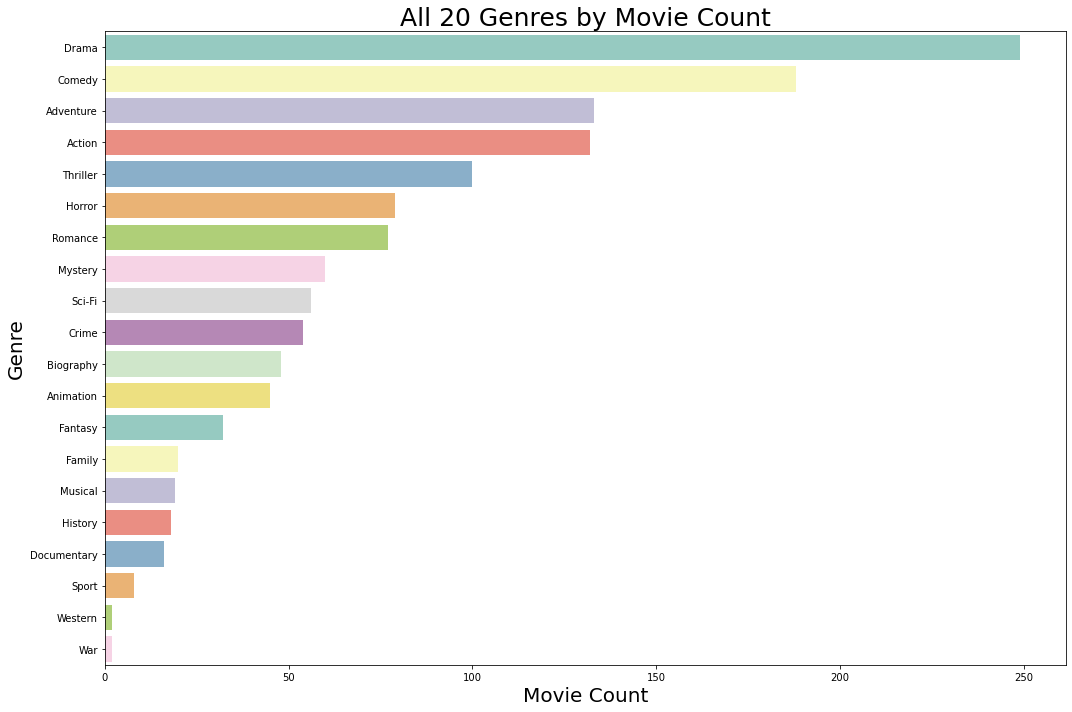

In [65]:
genre_counts = movies_df['genres'].value_counts()
top_n = len(genre_counts)
#making a data frame with only the genres
top_genres =genre_counts.nlargest(top_n).index
top_movies_df = movies_df[movies_df['genres'].isin(top_genres)]

# Create a count plot to visualize the movie count for each genre
plt.figure(figsize=(15, 10))  # Increase the figure width to accommodate more genres
sns.countplot(data=top_movies_df, y='genres', order=top_genres, palette='Set3')
plt.xlabel('Movie Count', size=20)
plt.ylabel('Genre', size=20)
plt.title(f'All {top_n} Genres by Movie Count', size=25)
plt.xticks(ha='center')  
plt.tight_layout()
plt.savefig(fname='./images/moviecountpergenre.png', facecolor='white') #save in images folder

plt.show()

From the above visualisation it is noted that most movies fall under the the Drama, Comedy, Adventure, Action and Thriller category. The least movies fall under Western and  War.

QN. What are the top 5 highest rated movie genres?

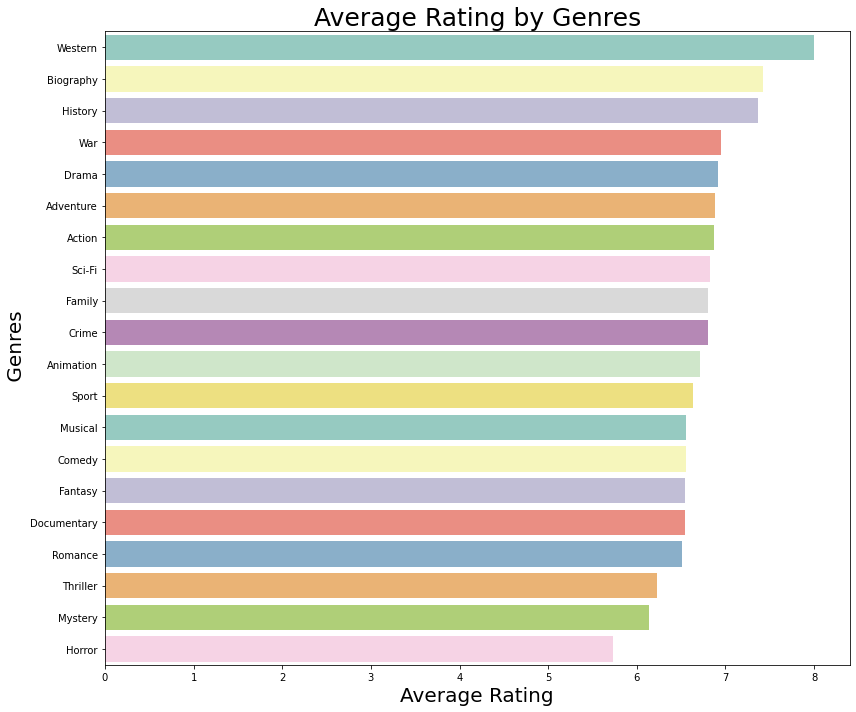

In [66]:
#Creating a barplot to visualize the highest rated movie genres
order_by = movies_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(data=movies_df, y='genres', x='averagerating', ci=None, 
            order=order_by.index, palette='Set3')
plt.xlabel('Average Rating', size=20)
plt.ylabel(' Genres', size=20)
plt.title('Average Rating by Genres', size=25)
plt.xticks(ha='center')  
plt.tight_layout()
plt.savefig(fname='./images/averageratingvsgenre.png', facecolor='white') #save in images folder

plt.show()

From the graph above, it can be observed that all the genres in our dataset have an average rating above 5. However, this information alone does not suggest a direct correlation between movie genres and the potential success of a movie studio. 

QN. Which genres tend to have the highest Return on Investment (ROI), and which genres tend to have the lowest Return on Investment (ROI)?

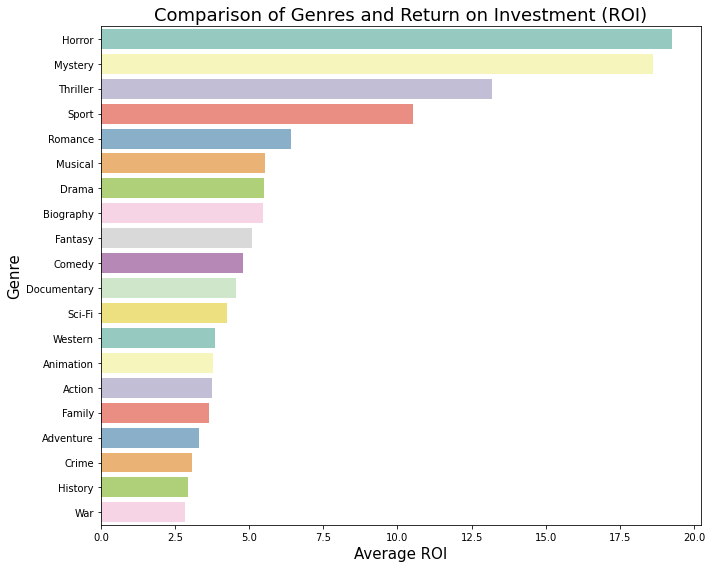

In [67]:
# Calculating average ROI for each genre
genre_avg_roi = movies_df.groupby('genres')['return_on_investment'].mean().reset_index()
# Sorting the genres by average ROI in descending order
genre_avg_roi = genre_avg_roi.sort_values(by='return_on_investment', ascending=False)
#Creating a barplot
plt.figure(figsize=(10, 8))
sns.barplot(data=genre_avg_roi, y='genres', x='return_on_investment', palette='Set3')
plt.xlabel('Average ROI', size=15)
plt.ylabel('Genre', size=15)
plt.title('Comparison of Genres and Return on Investment (ROI)', size=18)
plt.tight_layout()
plt.xticks(ha='center')
plt.savefig(fname='./images/averageROIvsgenre.png', facecolor='white') #save in images folder

plt.show()

From the above, it can be observed that the top 5 genres with highest average ROi are Horror, Mystery, Thriller, Sport and Romance and the genres with the lowest ROI are War, History, Crime, Adventure and Family.

QN. What is the distribution of net profit across different movie genres, and are there any genres that consistently tend to generate higher net profits than others? 

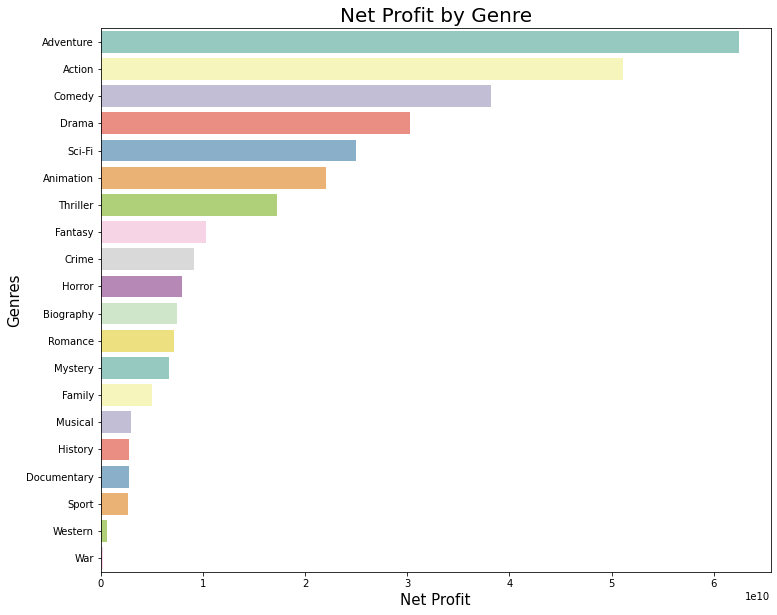

In [68]:
net_profit_by_genre = movies_df.groupby('genres')['net_profit'].sum().reset_index()
sorted_genres = net_profit_by_genre.sort_values(by='net_profit', ascending=False)
#Creating a barplot
plt.figure(figsize=(12, 10))
sns.barplot(data=sorted_genres, y='genres', x='net_profit', ci=None, estimator=sum, palette='Set3')
plt.xlabel('Net Profit',size=15 )
plt.ylabel('Genres', size=15)
plt.title('Net Profit by Genre', size=20)
plt.savefig(fname='./images/netprofitvsgenre.png', facecolor='white') #save in images folder

plt.show()

Adventure, Action, Comedy, Drama, and Sci-Fi are the top 5 genres with the highest net profit. These genres seem to be more financially successful compared to others while War and Western have the lowest net profit.

QN. Is there a correlation between the production budget and the net profit?


In [69]:
#Creating a separate df for the visualisation by merging the movies_budget and movieswithoutbudget
budgetvsprofit =pd.merge(movies_budget,movieswithoutbudget, how='inner', on='movie_title' )
budgetvsprofit = budgetvsprofit.drop(columns=['tconst', 'release_year'])
budgetvsprofit = budgetvsprofit[budgetvsprofit['return_on_investment'] >= 1]

In [70]:
#creating a function to round off the production budget
def round_off(budget):
    if budget < 1e8:
        return 'Under 100 million.'
    if budget < 2e8:
        return 'Under 200 million.'
    return 'Over 200 million.'

In [71]:
#mapping the function on the production budget column and adding a new column with the rounded off statement.
budgetvsprofit['budget_roundoff'] = budgetvsprofit['production_budget'].map(round_off)
budgetvsprofit.head(2)

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,net_profit,return_on_investment,foreign_gross,runtime_minutes,genres,averagerating,numvotes,studio,budget_roundoff
9,2010-02-05,Dear John,25000000.0,80014842.0,142033509.0,117033509.0,3.681340,62018667.0,108,"Drama,Romance,War",6.3,128657,SGem,Under 100 million.
11,2010-02-12,Valentine's Day,52000000.0,110485654.0,217569328.0,165569328.0,2.184026,107083674.0,125,"Comedy,Romance",5.7,107171,WB (NL),Under 100 million.


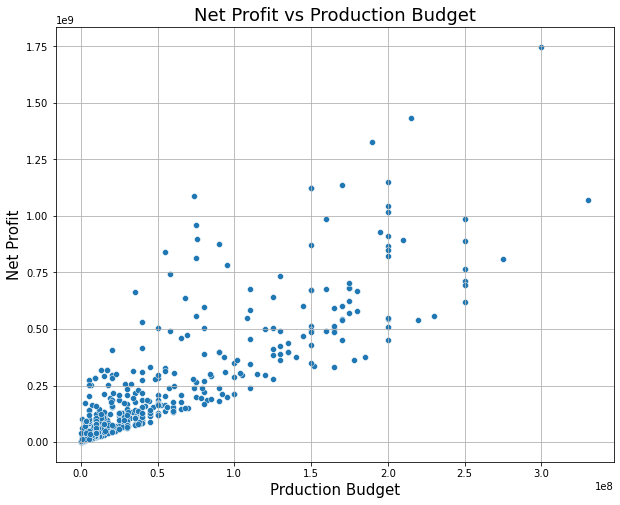

In [72]:
#Creating a scatterplot to show the correlation 
plt.figure(figsize=(10, 8))
sns.scatterplot(data=budgetvsprofit, x='production_budget', y='net_profit', palette='coolwarm')
plt.xlabel('Prduction Budget', size=15)
plt.ylabel('Net Profit', size=15)
plt.title('Net Profit vs Production Budget', size=18)
plt.grid(True)
plt.savefig(fname='./images/netprofitvsbudget.png', facecolor='white') #save in images folder

plt.show()

From the above scatterplot, it is observed that there is positive correlation between the Production budget and the Net profit.

Categories of Production Budget and the the Net Profit they generated.

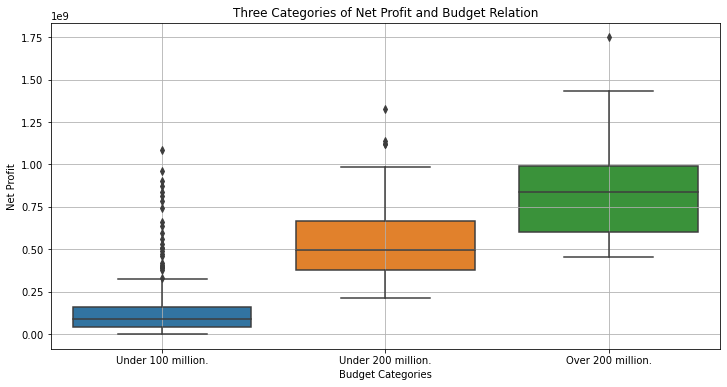

In [73]:
# Creating a boxplot to represent the production budget categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=budgetvsprofit, x='budget_roundoff', y='net_profit')
plt.xlabel('Budget Categories')
plt.ylabel('Net Profit')
plt.title('Three Categories of Net Profit and Budget Relation')
plt.grid(True)
plt.savefig(fname='./images/budgetandprofit.png', facecolor='white') #save in images folder
plt.show()

QN. Which movie studios have generated the highest net profit?

In [74]:
#checking the top 20 movie studios
movies_df['studio'].value_counts().head(20)

Uni.       179
Fox        142
BV         114
WB          92
Sony        89
Par.        76
LGF         70
FoxS        63
WB (NL)     62
Focus       54
Wein.       44
SGem        39
LG/S        32
ORF         25
SPC         24
Rela.       24
TriS        19
A24         17
STX         16
P/DW        15
Name: studio, dtype: int64

In [75]:
#replacing  WB(NL) with WB to count as WB
movies_df['studio'] = movies_df['studio'].replace('WB (NL)', 'WB')

In [76]:
#confirming the code worked
movies_df['studio'].value_counts().head(20)

Uni.     179
WB       154
Fox      142
BV       114
Sony      89
Par.      76
LGF       70
FoxS      63
Focus     54
Wein.     44
SGem      39
LG/S      32
ORF       25
SPC       24
Rela.     24
TriS      19
A24       17
STX       16
Sum.      15
P/DW      15
Name: studio, dtype: int64

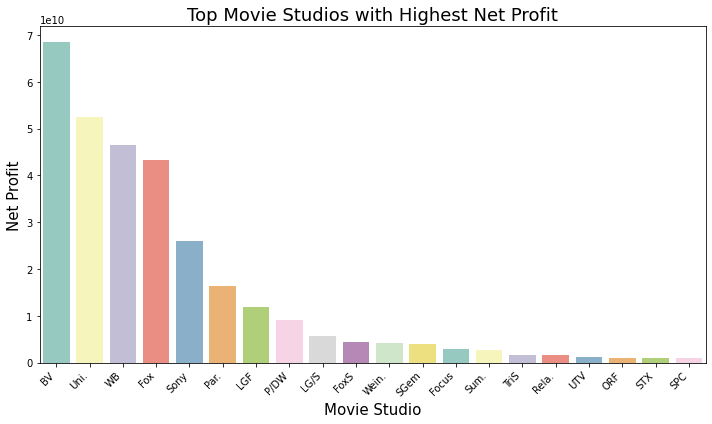

In [77]:
# Grouping the data by movie studio and calculating the total net profit for each studio
studio_net_profit = movies_df.groupby('studio')['net_profit'].sum().reset_index()
# Sorting the studios based on total net profit in descending order
studio_net_profit_sorted = studio_net_profit.sort_values(by='net_profit', ascending=False)
# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=studio_net_profit_sorted.head(20), x='studio', y='net_profit', palette='Set3')
plt.xlabel('Movie Studio', size=15)
plt.ylabel('Net Profit', size=15)
plt.title('Top Movie Studios with Highest Net Profit', size=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(fname='./images/netprofitvs_studios.png', facecolor='white') #save in images folder

plt.show()

The plot showcases the top 5 movie studios with the highest net profits as follows; Buena Vista(BV), Universal Pictures, Fox, Warner Bros(WB) and Sony.

QN. Which genres are most frequently produced by the top 4 movie studios with the highest net profit?

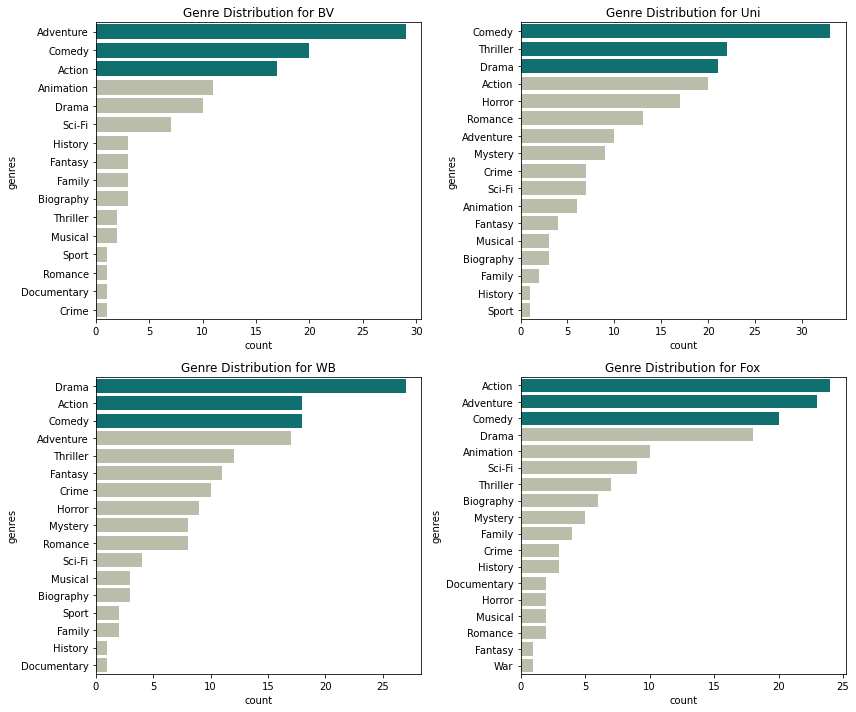

In [78]:
#Filtering the dataset to include movies produced by the top four movie studios
top_studios = ['BV', 'Uni.', 'WB', 'Fox']
top_studios_df = movies_df[movies_df['studio'].isin(top_studios)]
#Grouping the data by genre and counting the number of movies in each genre for each studio
genre_counts = top_studios_df.groupby(['studio', 'genres']).size().reset_index(name='count')
#Getting the order of genres based on their counts in descending order for each studio
genre_order_bv = genre_counts[genre_counts['studio'] == 'BV'].groupby('genres')['count'].sum().sort_values(ascending=False).index
genre_order_uni = genre_counts[genre_counts['studio'] == 'Uni.'].groupby('genres')['count'].sum().sort_values(ascending=False).index
genre_order_wb = genre_counts[genre_counts['studio'] == 'WB'].groupby('genres')['count'].sum().sort_values(ascending=False).index
genre_order_fox = genre_counts[genre_counts['studio'] == 'Fox'].groupby('genres')['count'].sum().sort_values(ascending=False).index

#Getting the top 3 genres for each studio
top_3_genres_bv = genre_order_bv[:3]
top_3_genres_uni = genre_order_uni[:3]
top_3_genres_wb = genre_order_wb[:3]
top_3_genres_fox = genre_order_fox[:3]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
#Ploting each bar plot in a figure
sns.barplot(data=genre_counts[genre_counts['studio'] == 'BV'], y='genres', x='count', order=genre_order_bv,
            palette=['#bec0a8' if genre not in top_3_genres_bv else '#008080' for genre in genre_order_bv], ax=axs[0, 0])
axs[0, 0].set_title('Genre Distribution for BV')

sns.barplot(data=genre_counts[genre_counts['studio'] == 'Uni.'], y='genres', x='count', order=genre_order_uni,
            palette=['#bec0a8' if genre not in top_3_genres_uni else '#008080' for genre in genre_order_uni], ax=axs[0, 1])
axs[0, 1].set_title('Genre Distribution for Uni')

sns.barplot(data=genre_counts[genre_counts['studio'] == 'WB'], y='genres', x='count', order=genre_order_wb,
            palette=['#bec0a8' if genre not in top_3_genres_wb else '#008080' for genre in genre_order_wb], ax=axs[1, 0])
axs[1, 0].set_title('Genre Distribution for WB')

sns.barplot(data=genre_counts[genre_counts['studio'] == 'Fox'], y='genres', x='count', order=genre_order_fox,
            palette=['#bec0a8' if genre not in top_3_genres_fox else '#008080' for genre in genre_order_fox], ax=axs[1, 1])
axs[1, 1].set_title('Genre Distribution for Fox')
plt.tight_layout()


plt.savefig('./images/genre_distribution.png', facecolor='white')

From the above bar plots, it is observed that the most common genres that the most profitable 
studios have produced are Action, Adventure, Comedy and Drama.

## Recommendations


- Microsoft should consider to make movies that fall under Drama, Comedy, Adventure and Action genres since they seem to have more appeal to the audience.
- Profitable genres: Microsoft should consider making movies that fall under Adventure, Action, Comedy and Drama as they have shown success in generating higher net profit.
- Budget Allocation: Movies with higher budgets have shown to be able to invest in better production values, such as special effects, star cast and marketing campaigns. These factors can attract more audience and result in higher ticket sales and total gross leading to higher net profit.
- Marketing and Distribution: Movies with bigger budgets often have more extensive marketing and distribution campaigns which can lead to higher visibility and awareness thus attracting larger audience and resultion inn higher net profits.
- Partnership and aqcuisitions: Microsoft could explore collaboration opportunities or strategic aqcuisitions with successful movie studios such as Universal Studios, Buena Vista, Fox and Warner Bros and broaden their market reach which may increase the revenues and overall profitability.
- Taking a risk: Microsoft should consider exploring movie genres with lesser movie counts to target untapped audience segments. While this approach carries some risk, it offers the opportunity for unique storytelling and creative concepts that may resonate strongly with specific audiences.


## Conclusions


Focus on producing movies in genres like Drama, Comedy, Adventure and Action to capitalize an audience appeal and potention for higher profits. Investing in higher-budget productions for better  quality movies, marketing and distribution strategies to attract a larger audience.

Not forgeting to be mindful of industry risks like market saturation and changing audience preferences. By conducting continuous research and strategic collaborations, Microsoft will be able to navigate challenges and make informed decisions.

Utilize brand strength and partnerships for success. Stay adaptable to changing trends and consumer demands for long-term profitability.